In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import numpy as np

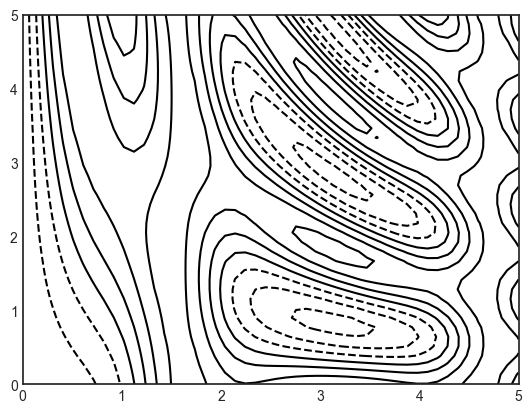

In [4]:
# 使用下列函數展示等高線圖
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# plt.contour 函式 需要x y參數 還有z參數(等高線)
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y) # 從一維陣列建立二維網格的函式
Z = f(X, Y)

# 只有線條的等高線圖
plt.contour(X, Y, Z, colors='black');

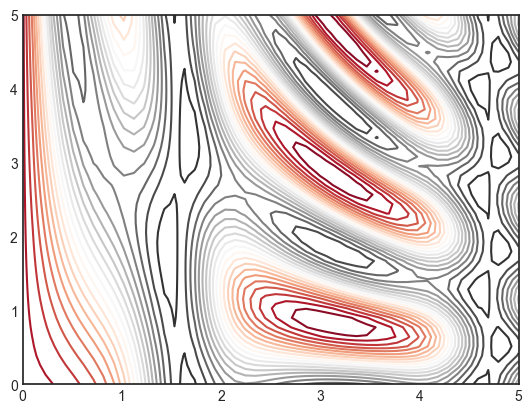

In [ ]:
# 可以使用 cmap 參數指定色彩編碼 選用RdGy("Red-Gray")
plt.contour(X, Y, Z, 20, cmap='RdGy');

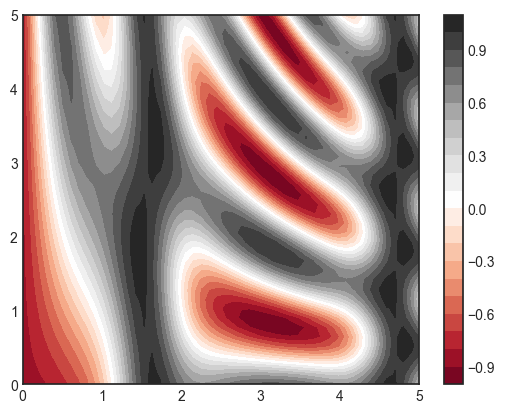

In [6]:
# 在線條間上色
plt.contourf(X, Y, Z, 20, cmap='RdGy')

# 但要加上 colorbar()
plt.colorbar();

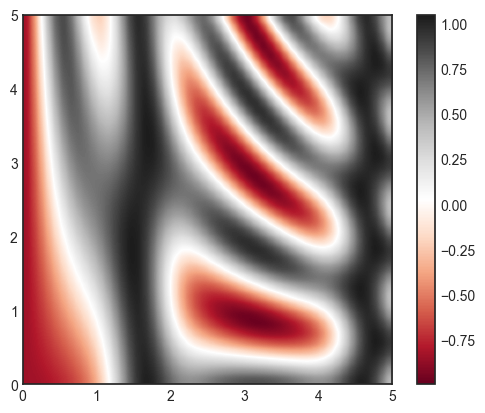

In [7]:
# 使用plt.imshow()
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
plt.colorbar();

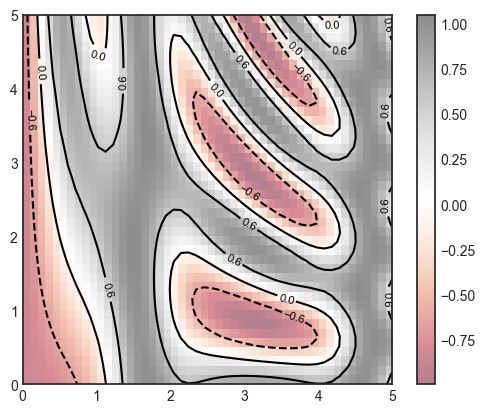

In [ ]:
# 使用plt.clabel() 傳入等高線圖
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline= True, fontsize=8)

# 會疊加到影像圖
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)

plt.colorbar();

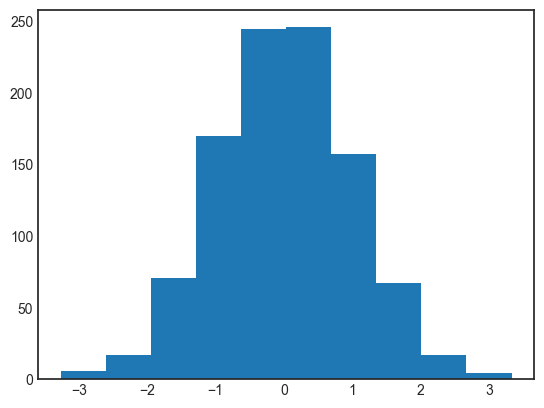

In [12]:
# 建立直方圖
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

plt.hist(data);

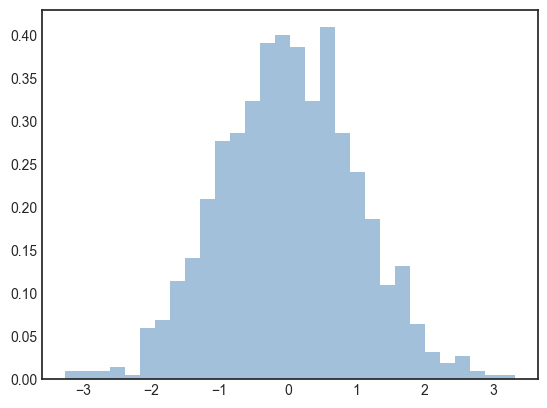

In [15]:
# 更加客製化的直方圖例子
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

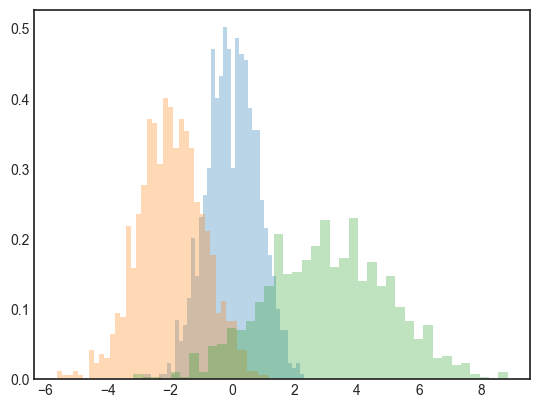

In [16]:
# 疊畫多個直方圖
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [17]:
# 如果只想看數字 不畫圖
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 23 241 491 224  21]


In [18]:
# 使用多變量高斯分佈(Multivariate Gaussian Distribution)
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

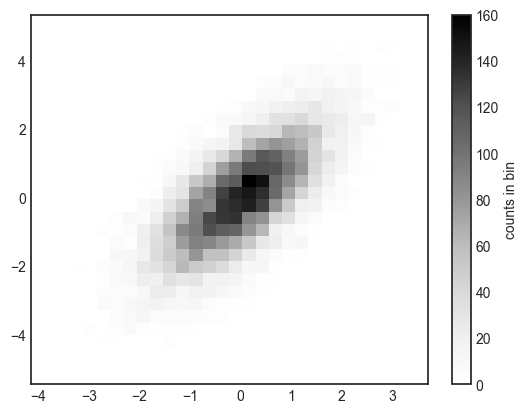

In [19]:
# 使用 Matplotlib 的 plt.hist2d() 來繪製二維直方圖
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

In [21]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)

(30, 30)


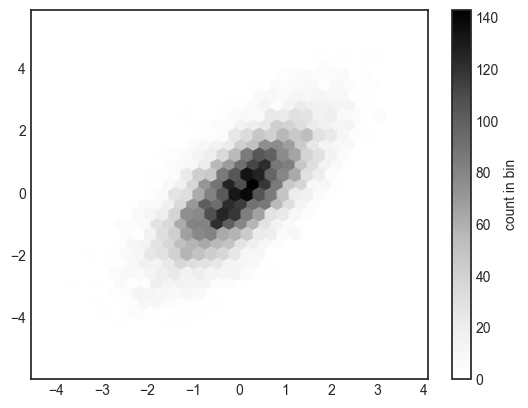

In [22]:
# 六角形方格進行分箱
plt.hexbin(x, y, gridsize=30)
cb =plt.colorbar(label='count in bin')

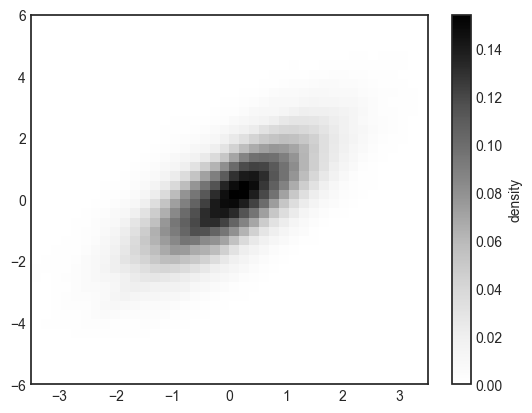

In [23]:
# 使用核密度估計的快速例子
from scipy.stats import gaussian_kde

# 放入一個陣列的大小 [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# e 在一個方形的格子上進行估值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 把結果畫成一個影像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")